In [234]:
import numpy as np
import matplotlib.pyplot as plt
import cmocean as cmo

In [235]:
# Set up the grid
spatial_size = 64 # Power of 2 ideal for CNN
dx = 1
dy = 1

time_steps = 10 # For now
dt = 1

In [236]:
# Create arrays for the grid
x = np.arange(0, spatial_size + dx, dx)
y = np.arange(0, spatial_size + dy, dy)
t = np.arange(0, time_steps + dt, dt)

# Create the grid
X, Y, T = np.meshgrid(x, y, t, indexing = 'ij') # matrix (row forward) indexing

In [ ]:
# Set the wave equation global parameters 
# NOTE T = 2pi / omega, lambda = 2pi / k


# NOTE Need propagating signal - play with different values for k and l on paper until
# there is a signal propagating east/west and north/south

k =  2 * np.pi # wave number (num rad per unit distance)
l =  1.98 * np.pi # wave number (num rad per unit distance)
omega =  np.pi # frequency (num rad per time)

In [238]:
def generate_wave_samples(n_samples, C,
                          A_range,
                          B_range,
                          seed=42):
    """
    Generates a defined number of toy wave data samples with for 2D waves propagating in 
    time and space following the wave equation:
            wave =  A_n * sin(k*x + l*y + omega*t) + B_n * cos(kx + l*y + omega*t) + C * eta
    
    where k, l (wave numbers) and omega (frequency) are fixed and amplitudes A_n and B_n are randomly generated, within
    a defined range, to vary across samples. The data are intended for a regression problem where amplitudes A and B are learned
    given A_n and B_n iput and wave ground truth data, with adjustable noise eta.
    
    Inputs:
        - n_samples: number of samples to be generated
        - C: noise amplitude
        - A_range: tuple range for A values
        - B_range: tuple range for B values
        - seed: random seed for reproducibility (default 42, set to 
        False for no seed)
    
    Returns:
        - waves: ground truth np.ndarray, shape [n_samples, x, y, time]
        - inputs: input data np.ndarray, shape [n_samples, 2]
    """

    # Initialize the random number generator
    rng = np.random.default_rng(seed)

    # Initialize lists for true and input data samples
    waves = []
    inputs = []

    # Loop through number of samples to generate wave sample properties
    for _ in range(n_samples):
        # Randomly generate A and B values for each wave 
        # NOTE use * for argument unpacking

        # NOTE use gaussian distribution for amplitudes - more physically likely
        A = rng.normal(*A_range)
        B = rng.normal(*B_range)
    
        # Randomly generate noise consistent with [x,y,t] grid shape
        eta = rng.standard_normal(X.shape)

        # Compute the true wave sample for the generated properties
        # NOTE k, l, omega are global variables defined outside fcn
        wave = A*np.sin(k*X + l*Y + omega*T) + B*np.cos(k*X + l*Y + omega*T) + C*eta
        # wave = A*np.sin(k*X + l*Y + omega*T) + C * eta

        # Append ground truth and input data for the sample
        waves.append(wave) # [n_samples, x, y, time]
        inputs.append([A,B]) # [n_samples, 2]


    # Return ground truth and input data as arrays
    return np.array(waves), np.array(inputs)

In [239]:
waves, inputs = generate_wave_samples(n_samples = 10,
                                      C = 0.0,
                                      A_range = (0.5, 5.0),
                                      B_range = (0.5, 5.0))

In [240]:
print(np.shape(waves), np.shape(inputs))

(10, 65, 65, 11) (10, 2)


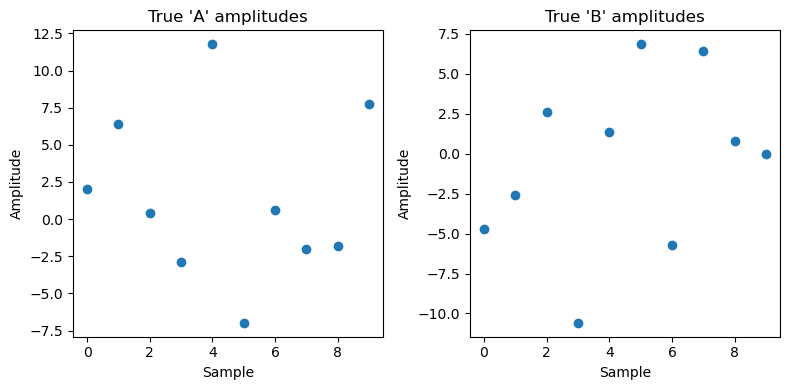

In [241]:
fig, axes = plt.subplots(1,2, figsize = (8,4))

plt1 = axes[0].scatter(np.arange(0,10,1), inputs[:,0])
axes[0].set_xlabel("Sample")
axes[0].set_ylabel("Amplitude")
axes[0].set_title("True 'A' amplitudes")

plt1 = axes[1].scatter(np.arange(0,10,1), inputs[:,1])
axes[1].set_xlabel("Sample")
axes[1].set_ylabel("Amplitude")
axes[1].set_title("True 'B' amplitudes")

fig.tight_layout()

plt.show()


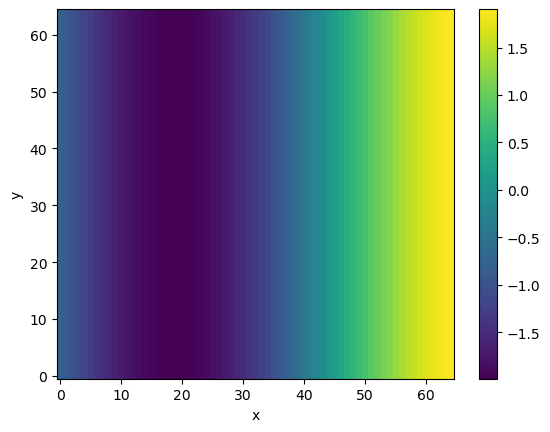

In [242]:
plt.pcolormesh(x, y, waves[8][:,:,5])
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

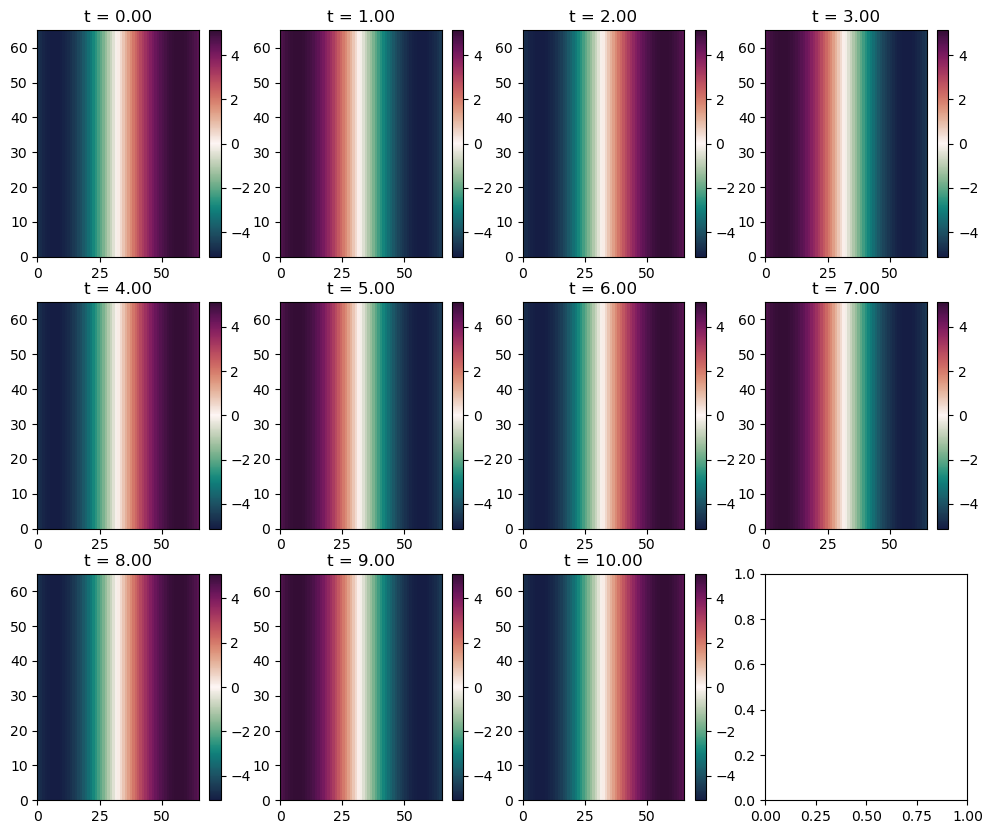

In [243]:
# Loop through time steps of wave

# Initialize figure
fig, axes = plt.subplots(3, 4, figsize = (12,10))

# Flatten axes for iteration
axes = axes.flatten()

# Play with colormap
cmap = cmo.cm.curl

for i in range(len(t)):
    pcm = axes[i].pcolormesh(waves[0][:,:,i], cmap = cmap)
    fig.colorbar(pcm, ax=axes[i])
    axes[i].set_title(f't = {t[i]:.2f}')
    

# fig.tight_layout()